HOUSE PRICING PREDICTION REGRESSION MODEL

Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [20]:

df = pd.read_csv(r"C:\Users\Dhanashree Sarode\Downloads\HousePricePrediction.csv")

In [22]:
# Data Preprocessing - Data cleaning

# Drop Id as it doesn't contribute in price
df.drop(['Id'], axis=1 ,inplace=True)

# Replacing SalePrice empty values with their mean values
df['SalePrice'] = df['SalePrice'].fillna(
  df['SalePrice'].mean()) 

# Drop records with null values
df = df.dropna()

df.isnull().sum()
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [23]:
# Data Preprocessing - Encoding
cols = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
df = pd.get_dummies(df, columns=cols, drop_first=True)

In [24]:
#splitting data
x=df.drop(columns=["SalePrice"])
y=df["SalePrice"]
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

print("Linear Regression")
print("R2:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_lr))


Linear Regression
R2: 0.3469223785187573
MAE: 32690.891525374318
RMSE: 48797.194708473966
MAPE: 0.2001699657711667


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)

y_pred_ridge = ridge.predict(x_test_scaled)

print("\nRidge Regression")
print("R2:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_ridge))



Ridge Regression
R2: 0.346913298805559
MAE: 32688.629872095167
RMSE: 48797.533920060996
MAPE: 0.20012597982802005


In [27]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10
)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("\nRandom Forest Regressor")
print("R2:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_rf))



Random Forest Regressor
R2: 0.4218530618696278
MAE: 31972.119834374273
RMSE: 45912.566400808064
MAPE: 0.19943625012379076


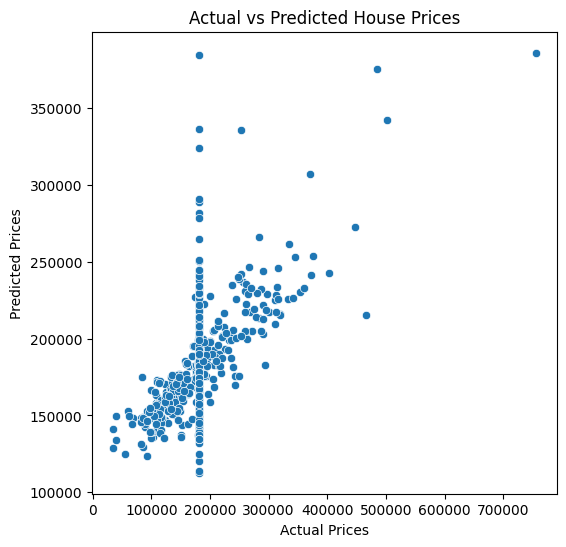

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
